# Capstone 2 -- Preprocessing and Training Data Development

## Introduction
This is notebook 3 of Springboard Capstone 2 covering Preprocessing and Training Developpment.  The previous notebooks covered 1. Data Wrangling and 2. EDA.
<br><br>
**The Data**<br>
The Data is derived from the [Online Retail II](https://archive.ics.uci.edu/dataset/502/online+retail+ii) dataset from the UCI machine learning repository.  The original dataset was a collection of all online transations from a UK based retail company from 01/12/2009 to 09/12/2011. 
<br><br>
The data was was cleaned to remove all cancelled orders, any duplicates and other miscelaneous items that needed cleaning.  The data was then split into two dataframes, one with known customers and one with unknown customers.  The unknown customer data was set aside and the known customer data was grouped by customer and transformed into a Recency, Frequency, Monetary (RFM) dataset.   
<br>
**The Goal** <br>
The goal with this project is to find the distinct customer segments to to allow the company to better focus on marketing strategies for each segment. The goal of this notebook is to expand the features of the dataset and to prepare the data for modeling.

## Imports and Defaults

**Import Libraries**

In [201]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

**Set Default Preferences**

In [203]:
# display all columns
pd.set_option('display.max_columns', None)

# surpress scientific notation
pd.options.display.float_format = '{:}'.format

**Import Data**

**'rfm' Dataframe**<br>
The 'rfm' dataframe is the main dataframe that will be used for modeling. It includes Recency, Frequency, and Monetary calculations from the 'has_id' df in the previous step which represents transactions from known customers in the Online Retail II dataset.

In [206]:
# import rfm df
path = '../Data/rfm.csv'
rfm = pd.read_csv(path)

In [207]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5878 non-null   float64
 1   Recency      5878 non-null   int64  
 2   Frequency    5878 non-null   int64  
 3   Monetary     5878 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 183.8 KB


Reload rfm with correct dtype and assign 'Customer ID' as the index

In [209]:
# Reload rfm with correct dtype
path = '../Data/rfm.csv'
dtype_dict= {'Recency': 'int32',
               'Frequency': 'int32',
               'Monetary': 'float32'}
rfm = pd.read_csv(path, dtype= dtype_dict, index_col='Customer ID')

In [210]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5878 non-null   int32  
 1   Frequency  5878 non-null   int32  
 2   Monetary   5878 non-null   float32
dtypes: float32(1), int32(2)
memory usage: 114.8 KB


In [211]:
rfm.describe()

,Recency,Frequency,Monetary
count,5878.0,5878.0,5878.0
mean,201.331915617557,6.289384144266758,2955.904052734375
std,209.33870672957246,13.009405882310057,14440.83984375
min,1.0,1.0,2.950000047683716
25%,26.0,1.0,342.27999114990234
50%,96.0,3.0,867.739990234375
75%,380.0,7.0,2248.3049926757812
max,739.0,398.0,580987.0625


**'has_id' Dataframe** <br>
The 'has_id' dataframe is imported for feature engineering to calculate customer lifetime and Customer Lifetime Value.

In [213]:
path2 = '../Data/has_id.csv'
has_id = pd.read_csv(path2)
has_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779425 entries, 0 to 779424
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      779425 non-null  int64  
 1   StockCode    779425 non-null  object 
 2   Description  779425 non-null  object 
 3   Quantity     779425 non-null  int64  
 4   InvoiceDate  779425 non-null  object 
 5   Price        779425 non-null  float64
 6   Customer ID  779425 non-null  float64
 7   Country      779425 non-null  object 
 8   Sales        779425 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 53.5+ MB


In [214]:
# Reload with correct dtype
dtype_dict2 = {'Invoice':'string',
              'StockCode':'string',
              'Description':'string',
              'Quantity':'int32',
              'Price':'float32',
              'Customer ID':'string',
              'Country':'string',
              'Sales':'float32'}

has_id = pd.read_csv(path2, dtype=dtype_dict2, parse_dates=['InvoiceDate'])
has_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779425 entries, 0 to 779424
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  string        
 1   StockCode    779425 non-null  string        
 2   Description  779425 non-null  string        
 3   Quantity     779425 non-null  int32         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float32       
 6   Customer ID  779425 non-null  string        
 7   Country      779425 non-null  string        
 8   Sales        779425 non-null  float32       
dtypes: datetime64[ns](1), float32(2), int32(1), string(5)
memory usage: 44.6 MB


## Model 1: RFM only

### Model 1: Pre Processing - Transform and Scale
Due to the highly skewed nature of the data and the different magnitudes of the data, the dataframe will be transformed and standardized. Power Transformer will be used to transform the data to deal with the skewness. Standard Scaler will be used to standardized the data to deal with differences in magnitude.

In [217]:
# Transform data
power_transformer = PowerTransformer()
rfm_transformed = power_transformer.fit_transform(rfm)

# Scale data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_transformed)

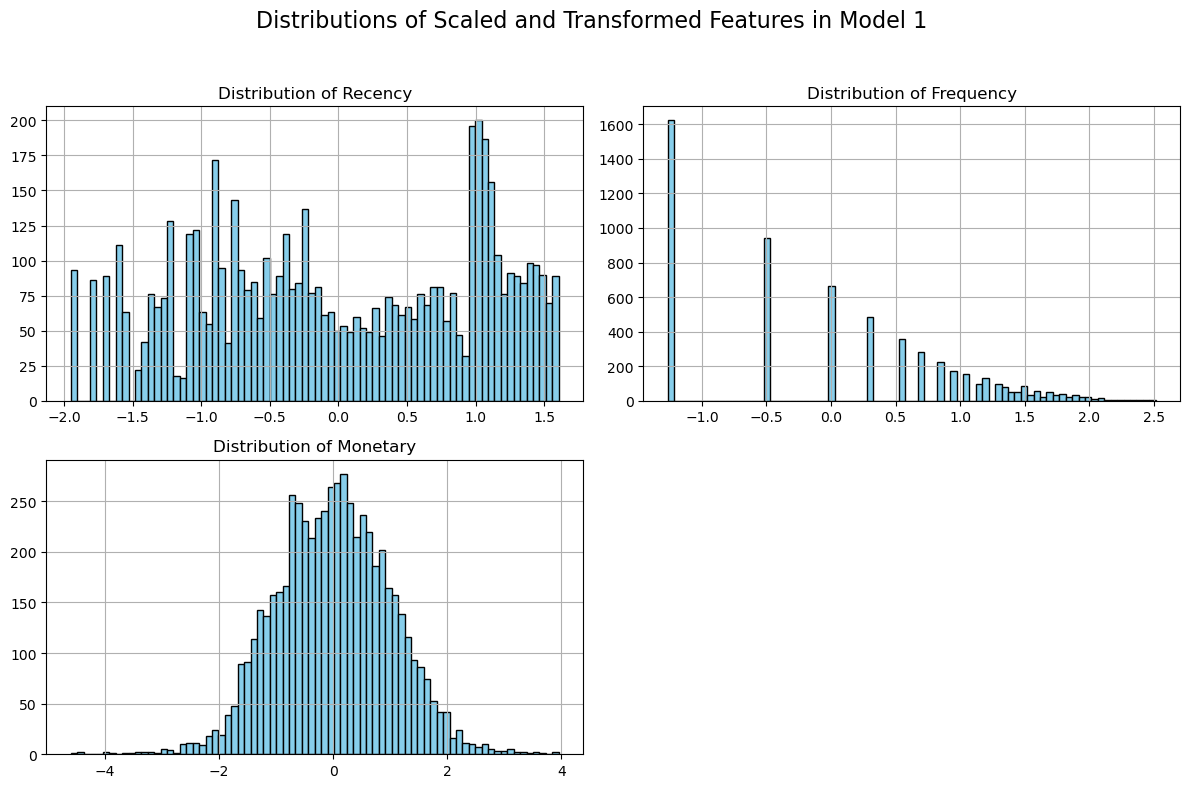

In [218]:
# Example: Creating the DataFrame to view trqnsformes and scaled data
scaled_transformed_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Plot histograms
axes = scaled_transformed_df.hist(
    bins=int(np.sqrt(len(scaled_transformed_df))), 
    figsize=(12, 8), 
    color='skyblue', 
    edgecolor='black'
)

# Add an overall title to the figure
plt.suptitle('Distributions of Scaled and Transformed Features in Model 1 ', fontsize=16)

# Optional: Add individual titles for each subplot
for ax, column in zip(axes.flatten(), scaled_transformed_df.columns):
    ax.set_title(f'Distribution of {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()


While the distributions are not perfectly normal thay are way less skewed and they are standardized.

## Model 2: RFM w/ Expanded Features
Model two will expand on the RFM model and add additional features including Average Order Value, Customer Lifetime, and Customer Lifetime Value.

### Feature Engineering

In [222]:
rfm.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [223]:
#Copy rfm to form new df for added features
rfm_expanded = rfm.copy(deep=True)

**Average Order Value** give insight into the size of average orders.

In [225]:
# calculate Average Order Value (aov)
rfm_expanded['AOV'] = rfm.Monetary / rfm.Frequency
rfm_expanded

,Recency,Frequency,Monetary,AOV
Customer ID,,,,
12346.0,326,12,77556.4609375,6463.038411458333
12347.0,2,8,4921.52978515625,615.1912231445312
12348.0,75,5,2019.4000244140625,403.8800048828125
12349.0,19,4,4428.68994140625,1107.1724853515625
12350.0,310,1,334.3999938964844,334.3999938964844
...,...,...,...,...
18283.0,4,22,2664.89990234375,121.13181374289773
18284.0,432,1,461.67999267578125,461.67999267578125
18285.0,661,1,427.0,427.0


In [226]:
rfm_expanded.AOV.describe()

count               5878.0
mean    385.18084076162313
std     1214.2864588587054
min      2.950000047683716
25%      176.6825065612793
50%     279.24268886021207
75%     414.90245351070115
max               84236.25
Name: AOV, dtype: float64

**Customer Lifespan (lifespan)** gives insight into the length of time the customer has been purchasing from the company.  Customers with longer lifespans will in theory have higher total Monetary values. This can help distinguish between customers who are recent big spenders customers who have long lifespan and therefor have a higher Monetary Value.  Additionally it give insight into length of time buying from the company.
<br><br>
The rfm dataframe was created from the has_id dataframe in a previous step but it does not have 'InvoiceDate' which is needed to calculate lifespan.  'has_id' will be used to create the new lifespan value.

In [228]:
# print(rfm_expanded['Customer ID'].nunique(), has_id['Customer ID'].nunique())
# rfm_expanded.head()
# has_id.head()

Because rfm has the Customer ID set as the index and has_id has it as a column, the index needs to be reset for rfm_expanded before the lifetime calculation and then be set back as the index.  Additionally, I calculated the Recency value as if it were the day after the last transaction.  For consistency, I  will add 1 to the Lifespan calculation to match the date of calculation.

In [230]:
# Make Customer ID a column
rfm_expanded = rfm_expanded.reset_index()  # Make Customer ID a column

# create lifespan from latest purchase - earliest purchase + 1 to be consistent with Recency calculation
rfm_expanded['Lifespan'] = has_id.groupby('Customer ID')['InvoiceDate'].transform(lambda x: (x.max() - x.min()).days + 1)

# re-set Customer ID as index
rfm_expanded = rfm_expanded.set_index('Customer ID')  


In [231]:
rfm_expanded.Lifespan.describe()

count               5878.0
mean     598.1536236815243
std     204.46035175426545
min                    1.0
25%                  532.0
50%                  706.0
75%                  730.0
max                  739.0
Name: Lifespan, dtype: float64

**Customer Lifetime Value (CLV)** gives better insight into customer segmentation than RFM alone.  Customers can have similar RFM but very different CLV.  Adding CLV allows the company to focus on the value the customer adds.  It also allows the company to market to different types of customers.

In [233]:
# Calculate CLV
rfm_expanded['CLV'] = rfm_expanded.AOV * rfm.Frequency * rfm_expanded.Lifespan
rfm_expanded

,Recency,Frequency,Monetary,AOV,Lifespan,CLV
Customer ID,,,,,,
12346.0,326,12,77556.4609375,6463.038411458333,582,45137860.265625
12347.0,2,8,4921.52978515625,615.1912231445312,582,2864330.3349609375
12348.0,75,5,2019.4000244140625,403.8800048828125,582,1175290.8142089844
12349.0,19,4,4428.68994140625,1107.1724853515625,582,2577497.5458984375
12350.0,310,1,334.3999938964844,334.3999938964844,582,194620.7964477539
...,...,...,...,...,...,...
18283.0,4,22,2664.89990234375,121.13181374289773,728,1940047.12890625
18284.0,432,1,461.67999267578125,461.67999267578125,728,336103.03466796875
18285.0,661,1,427.0,427.0,728,310856.0


In [234]:
rfm_expanded.CLV.describe()

count               5878.0
mean    1814270.9560715777
std      8800686.989548817
min                  12.75
25%     172992.76377868652
50%      469471.7133178711
75%     1323966.2236328125
max         336391509.1875
Name: CLV, dtype: float64

### Model 2: Pre Processing - Transform and Scale
As like above Power Transformer will be used to handle the skewness and Standard Scaler will be used for standardization.

In [236]:
# Transform Model 2 Train Data
transformer2 = PowerTransformer()
rfm_expanded_transformed = transformer2.fit_transform(rfm_expanded)


In [237]:
# Scale Model 2 Train Data
scaler2=StandardScaler()
rfm_expanded_scaled = scaler2.fit_transform(rfm_expanded_transformed)


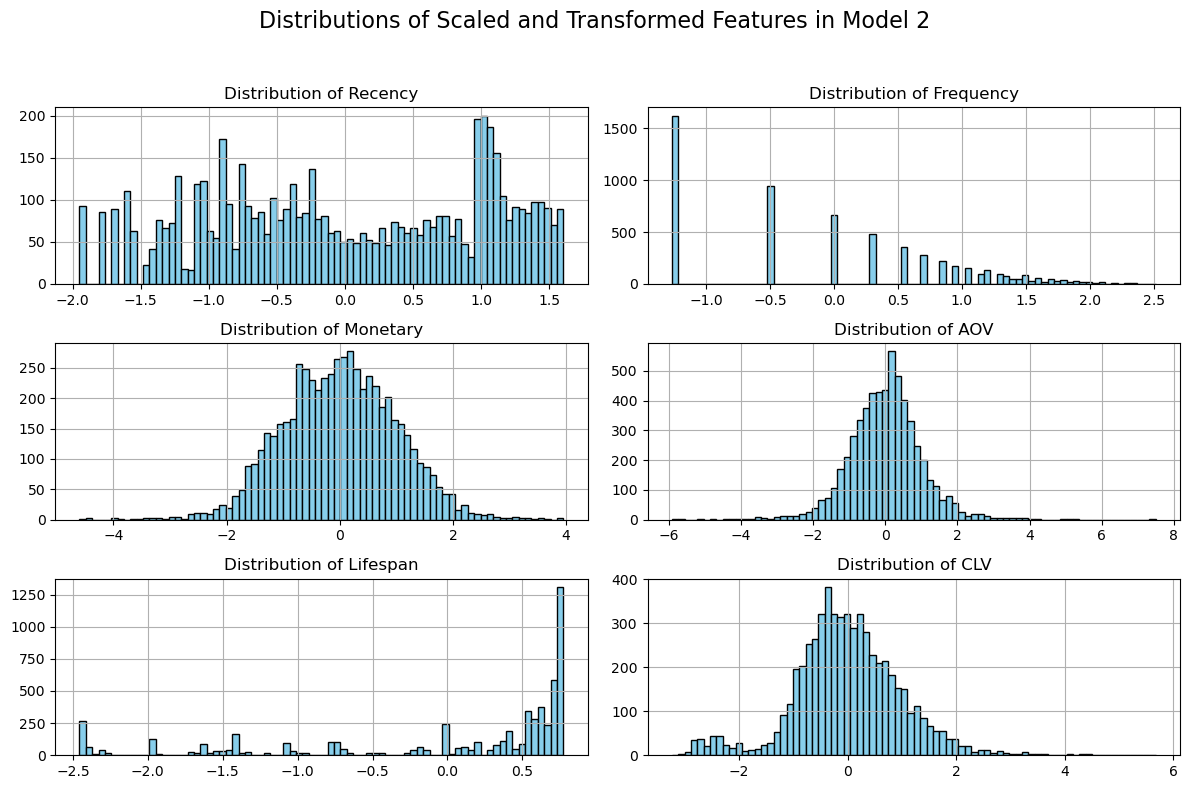

In [238]:
# Example: Creating the DataFrame to view transformes and scaled data
scaled_transformed_df2 = pd.DataFrame(rfm_expanded_scaled, columns=['Recency', 'Frequency', 'Monetary', 'AOV', 'Lifespan', 'CLV'])

# Plot histograms
axes = scaled_transformed_df2.hist(
    bins=int(np.sqrt(len(scaled_transformed_df2))), 
    figsize=(12, 8), 
    color='skyblue', 
    edgecolor='black'
)

# Add an overall title to the figure
plt.suptitle('Distributions of Scaled and Transformed Features in Model 2', fontsize=16)

# Optional: Add individual titles for each subplot
for ax, column in zip(axes.flatten(), scaled_transformed_df2.columns):
    ax.set_title(f'Distribution of {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

Again, the Data is not perfectly normal but has more normal distributions than the untransformed data.

## Export Datasets
Export for future use the expanded rfm dataframe, and the scaled version of rfm and rfm_expanded.

In [241]:
# rfm.columns
rfm_expanded.columns

Index(['Recency', 'Frequency', 'Monetary', 'AOV', 'Lifespan', 'CLV'], dtype='object')

Convert the scaled arrays to dataframes then save to .csv

In [243]:
# export expanded rfm df
rfm_expanded.to_csv('../Data/rfm_expanded.csv', index = True)

# Convert Model 1 transformes/scaled arrays to DF
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=list(rfm.columns), index=rfm.index)

# Export Model 1  data
rfm_scaled_df.to_csv('../Data/rfm_scaled_df.csv', index = True)

# Convert Model 2 arrays to DF
rfm_expanded_scaled_df = pd.DataFrame(rfm_expanded_scaled, columns=list(rfm_expanded.columns), index=rfm_expanded.index)

# Export Model 2 train/test data
rfm_expanded_scaled_df.to_csv('../Data/rfm_expanded_scaled_df.csv', index = True)


In [244]:
# rfm_scaled_df

# rfm_expanded_scaled_df

## Conclusion
In this notebook the 'rfm' dataframe was expanded to create 'rfm_expanded' to include additional features Average Order Value ('AOV'), Customer Lifespan ('Lifespan'), and Customer Lifesman Value ('CLV').  Both the 'rfm' and 'rfm_expanded' dataframes were transformed to correct for skewness and scaled to account for different magnitudes in the data in preparation for Modeling in the next notebook.